Mean Squared Error: 115550.72857154842
Root Mean Squared Error: 339.9275342945146
R-squared: 0.9997449479346994
Intercept (b): 18907.99712599504

Coefficients (a1, a2, a3, a4, a5):
Open: -11660.914553643099
High: 19352.742560057854
Low: 13067.627878995756
Volume: -3.1981271403796327
Date_num: 6.32978725834942


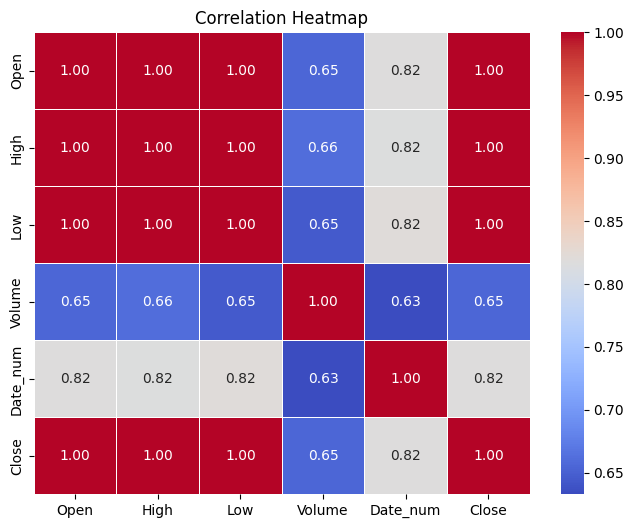

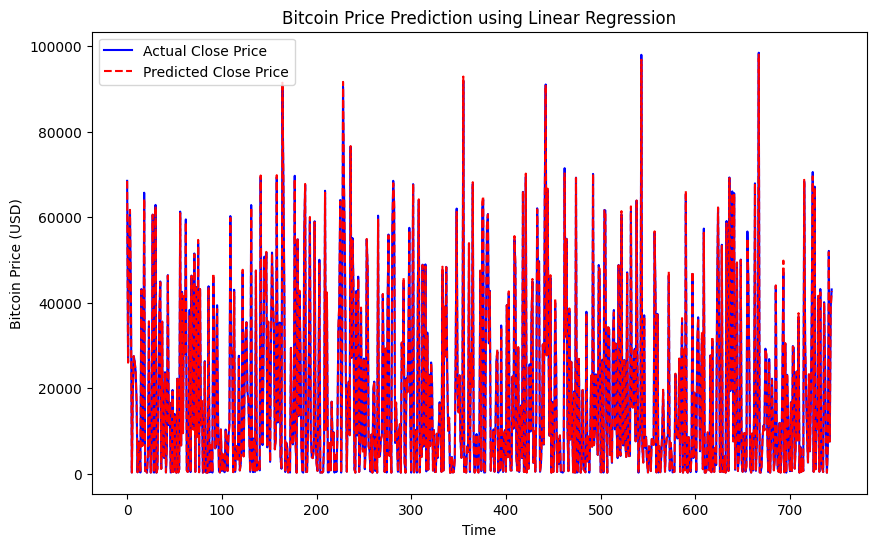

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Step 1: Load the dataset
df = pd.read_csv('Bitcoin_Historical_Data.csv')



df['Date'] = pd.to_datetime(df['Date'])
df['Date_num'] = (df['Date'] - df['Date'].min()) / np.timedelta64(1, 'D')  # Number of days since the first entry

# Drop rows with missing values (if any)
df = df.dropna()

# Step 3: Select Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume', 'Date_num']]  # Features
y = df['Close']  # Target variable

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (optional but helps with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Calculate R-squared value
r2_score = model.score(X_test_scaled, y_test)
print(f'R-squared: {r2_score}')

# Print the intercept (b)
print(f"Intercept (b): {model.intercept_}")

# Print the coefficients (a1, a2, a3, a4, a5)
print("\nCoefficients (a1, a2, a3, a4, a5):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


corr_matrix = df[['Open', 'High', 'Low', 'Volume', 'Date_num', 'Close']].corr()

# Step 11: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red', linestyle='dashed')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


Mean Squared Error: 336964.1117803267
Root Mean Squared Error: 580.4860995582295
R-squared: 0.9992562280333133


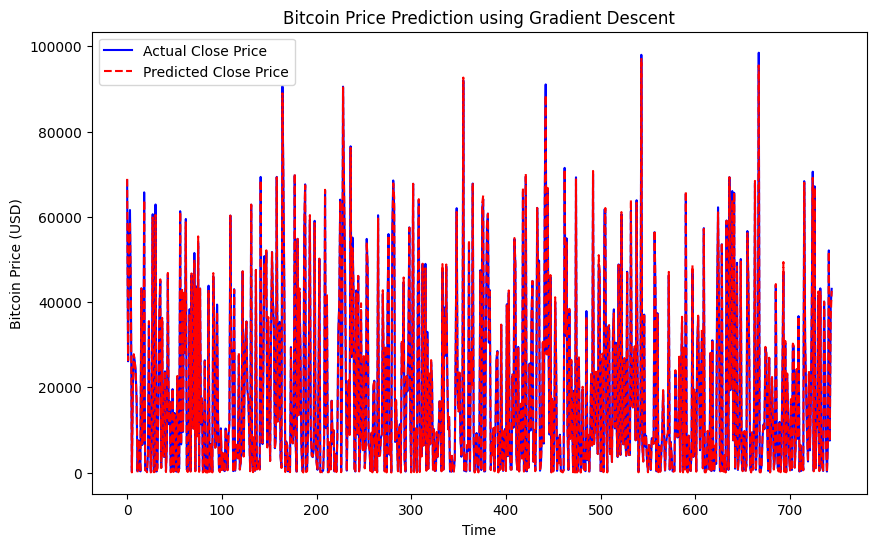

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('Bitcoin_Historical_Data.csv')

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df['Date_num'] = (df['Date'] - df['Date'].min()) / np.timedelta64(1, 'D')  # Number of days since the first entry
df = df.dropna()  # Drop missing values

# Step 3: Select Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume', 'Date_num']]  # Features
y = df['Close']  # Target variable

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (intercept) to X_train and X_test
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Adding a column of ones for bias term
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Adding a column of ones for bias term

# Step 6: Initialize parameters (weights) for Gradient Descent
theta = np.zeros(X_train_scaled.shape[1])  # Initialize weights (including bias term)
learning_rate = 0.01  # Learning rate
iterations = 1000  # Number of iterations
m = len(y_train)  # Number of training examples

# Step 7: Implement Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    for _ in range(iterations):
        predictions = X.dot(theta)  # Hypothesis function
        error = predictions - y
        gradient = (1/m) * X.T.dot(error)  # Compute the gradient
        theta -= learning_rate * gradient  # Update the weights (theta)
    return theta

# Step 8: Run Gradient Descent
theta = gradient_descent(X_train_scaled, y_train, theta, learning_rate, iterations)

# Step 9: Make Predictions
y_pred_train = X_train_scaled.dot(theta)  # Predictions on training data
y_pred_test = X_test_scaled.dot(theta)  # Predictions on test data

# Step 10: Evaluate the Model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared value
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_test) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print(f'R-squared: {r2_score}')

# Step 11: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred_test, label='Predicted Close Price', color='red', linestyle='dashed')
plt.title('Bitcoin Price Prediction using Gradient Descent')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()
